In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Define file locations

In [3]:
loc_data = os.path.join('..', 'data')
loc_city_pop = os.path.join(loc_data, 'cities_population.xlsx')
loc_energy_market = os.path.join(loc_data, 'energy_market.csv')
loc_figures = os.path.join('..', 'figures')

## Global settings for all plots

In [4]:
# Set the font to the standard LaTeX font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Increase the font size
plt.rcParams['font.size'] = 14

## Display city populations

In [5]:
df_city_pop = pd.read_excel(loc_city_pop, index_col = [0])

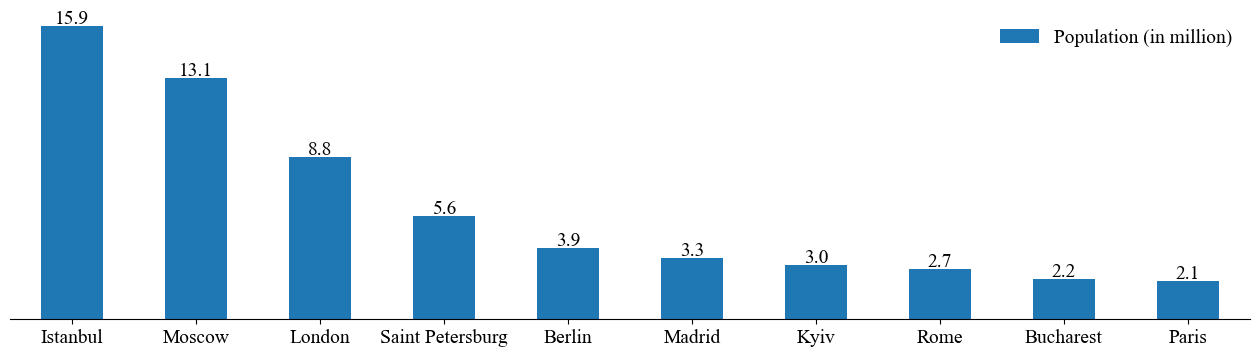

In [6]:
fig, ax = plt.subplots(figsize=(16, 4))
df_city_pop.plot.bar(ax=ax)

# Set the font to the standard LaTeX font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Increase the font size
plt.rcParams['font.size'] = 14

# Adjust x tick labels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove left, right, and top boundaries
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Remove y tick labels
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xlabel('')

# Add total number labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height / 10 ** 6:.1f}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend(['Population (in million)'], frameon = False)

plt.show()

fig.savefig(os.path.join(loc_figures, 'population.png'));

## Display energy market shares

In [7]:
df_energy = pd.read_csv(loc_energy_market, index_col = [0])

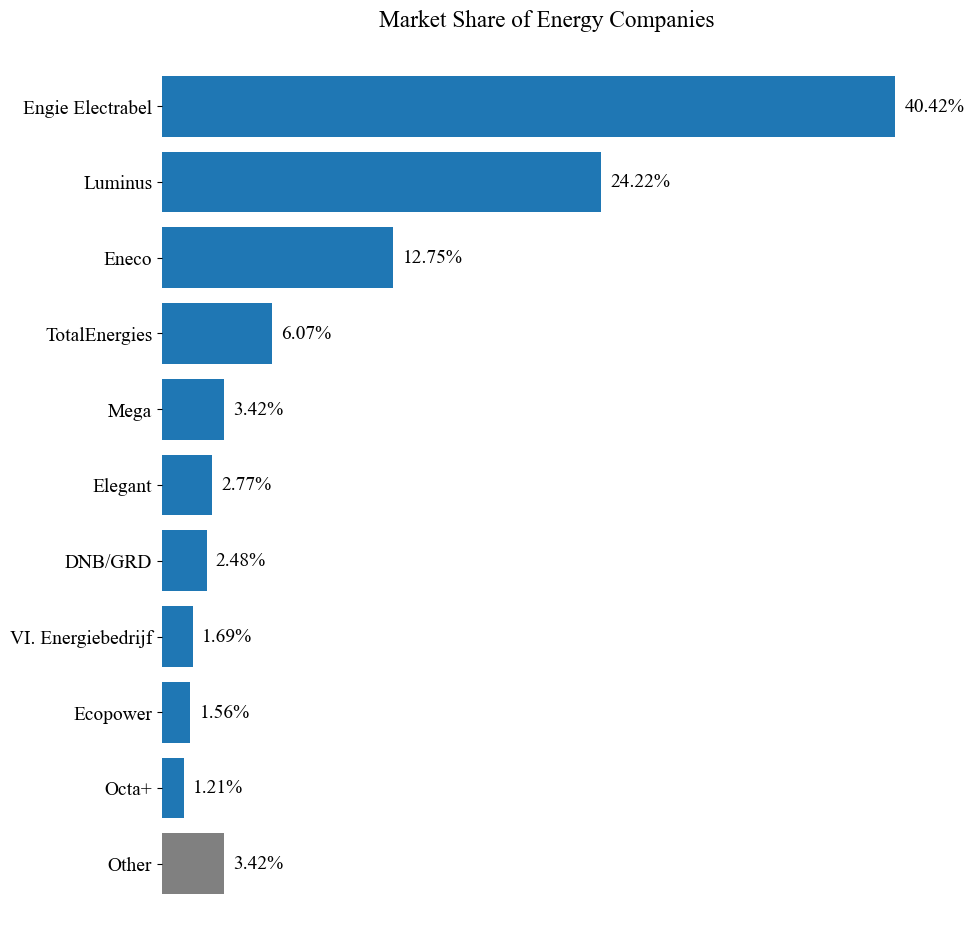

In [18]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(11, 10))  # Set the size of the figure

# Define the colors for the bars
colors = ['grey'] + ['#1f77b4'] * (len(df_energy) - 1)  # Set the last bar color to grey

# Plot the data using a horizontal bar chart with customized colors
ax.barh(df_energy.index[::-1], df_energy['Market Share'][::-1], color=colors)

# Customize the chart
ax.set_xlabel('')  # Remove x label
ax.set_ylabel('')
ax.set_title('Market Share of Energy Companies')

# Turn off all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add value annotations at the end of each bar
for i, value in enumerate(df_energy['Market Share'][::-1]):
    ax.text(value + 0.5, i, str(value) + '%', ha='left', va='center')

# Remove x-axis ticks and tick labels
ax.set_xticks([])
ax.set_xticklabels([])

# Adjust figure margins
plt.subplots_adjust(top=0.9, bottom=0)
plt.subplots_adjust(left=0.2)  # Increase or decrease the left margin value as needed

# Display the chart
plt.show()

fig.savefig(os.path.join(loc_figures, 'market_shares.png'))
